In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
size_functions = 128
alpha = 0.5
nb_epoch = 200000

In [ ]:
def generate_functions(size=128):
  df=[]
  for k in range(size+1):
    function_k = np.ones((size))
    for i in range(k):
      function_k[i] = 0
    df.append(function_k)
  return np.array(df)

In [ ]:
def visualization_step_function(step_function):
  plt.plot(step_function)

def full_visualization(X):
  fig, axs = plt.subplots(math.ceil(X.shape[0]/8), 8,figsize=(15,math.ceil(X.shape[0]/8)*2))
  for k in range (X.shape[0]):
    axs[k//8, k%8].plot(X[k])
    axs[k//8, k%8].set_title(str(k))


In [ ]:
X_np = generate_functions(size_functions)
X = torch.from_numpy(X_np).float()
print(X.shape)
print(X)
#visualization_step_function(X[64])
X_partial = torch.from_numpy(np.concatenate((X_np[:60],X_np[70:]))).float()
print(X_partial.shape)
print(X_partial)

torch.Size([129, 128])
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 0., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([119, 128])
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 0., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


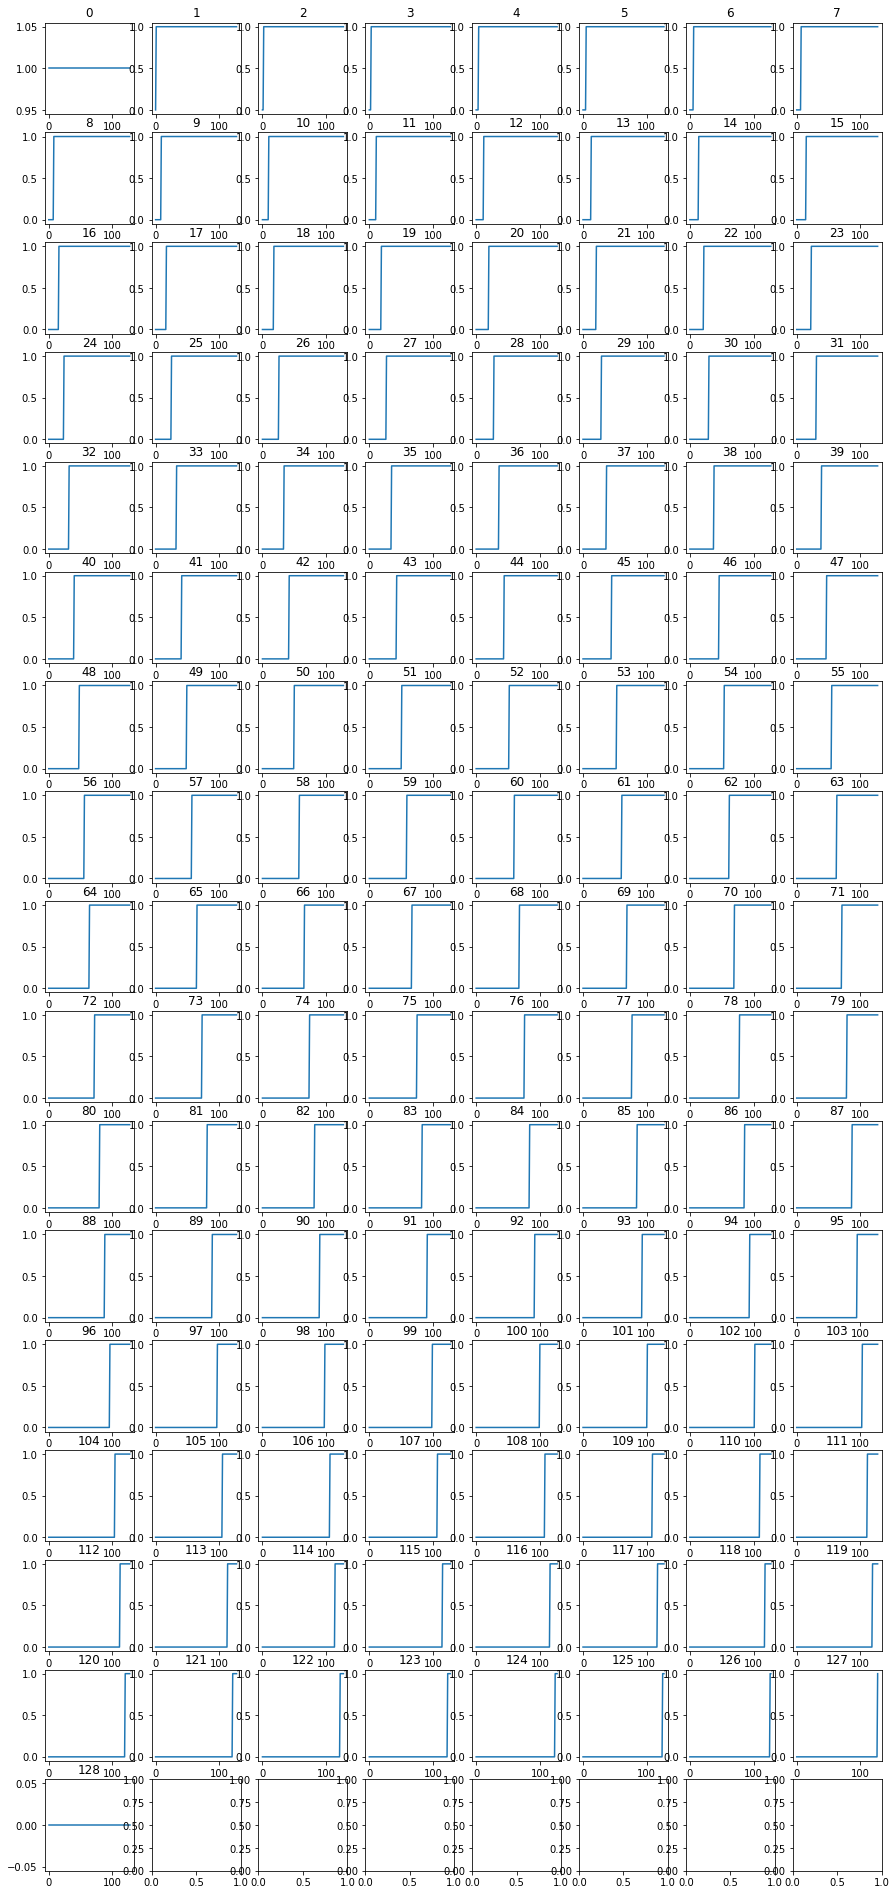

In [ ]:
full_visualization(X_np)

In [ ]:

class Autoencoder(nn.Module):
    def __init__(self,size_functions):
        super(Autoencoder, self).__init__()
        self.fc1 = nn.Linear(size_functions,1) # encoder
        self.fc2 = nn.Linear(1,size_functions) # decoder
    def forward(self,X):
        A0 = X
        A1 = F.leaky_relu(self.fc1(X))  
        A2 = F.sigmoid(self.fc2(A1))
        return A2

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


In [ ]:
model = Autoencoder(size_functions)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0, loss 0.27334722876548767
epoch 10000, loss 0.17326000332832336
epoch 20000, loss 0.0739741250872612
epoch 30000, loss 0.04745182767510414
epoch 40000, loss 0.03717847913503647
epoch 50000, loss 0.0316181518137455
epoch 60000, loss 0.028085917234420776
epoch 70000, loss 0.025537727400660515
epoch 80000, loss 0.023587405681610107
epoch 90000, loss 0.02212127484381199
epoch 100000, loss 0.02084464207291603
epoch 110000, loss 0.0198395736515522
epoch 120000, loss 0.018914952874183655
epoch 130000, loss 0.018174143508076668
epoch 140000, loss 0.017526760697364807
epoch 150000, loss 0.016953378915786743
epoch 160000, loss 0.016374342143535614
epoch 170000, loss 0.015909235924482346
epoch 180000, loss 0.015487568452954292
epoch 190000, loss 0.01505120750516653


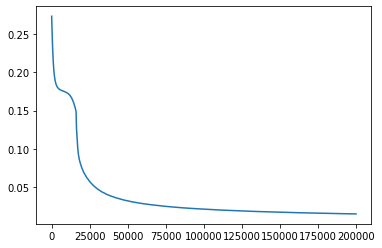

In [ ]:
loss_l = []
for num_epoch in range(nb_epoch):
  X_predicted = model(X_partial) #Pass through autoencoder
  loss = criterion(X_predicted, X_partial) # Compute loss 
  # Zero gradients, perform a backward pass, and update the weights. 
  optimizer.zero_grad() # re-init the gradients (otherwise they are cumulated)
  loss.backward() # perform back-propagation
  optimizer.step() # update the weights
  loss_l.append(loss)
  if num_epoch % 10000 == 0:
      print('epoch {}, loss {}'.format(num_epoch, loss.item()))
plt.plot(loss_l)        

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


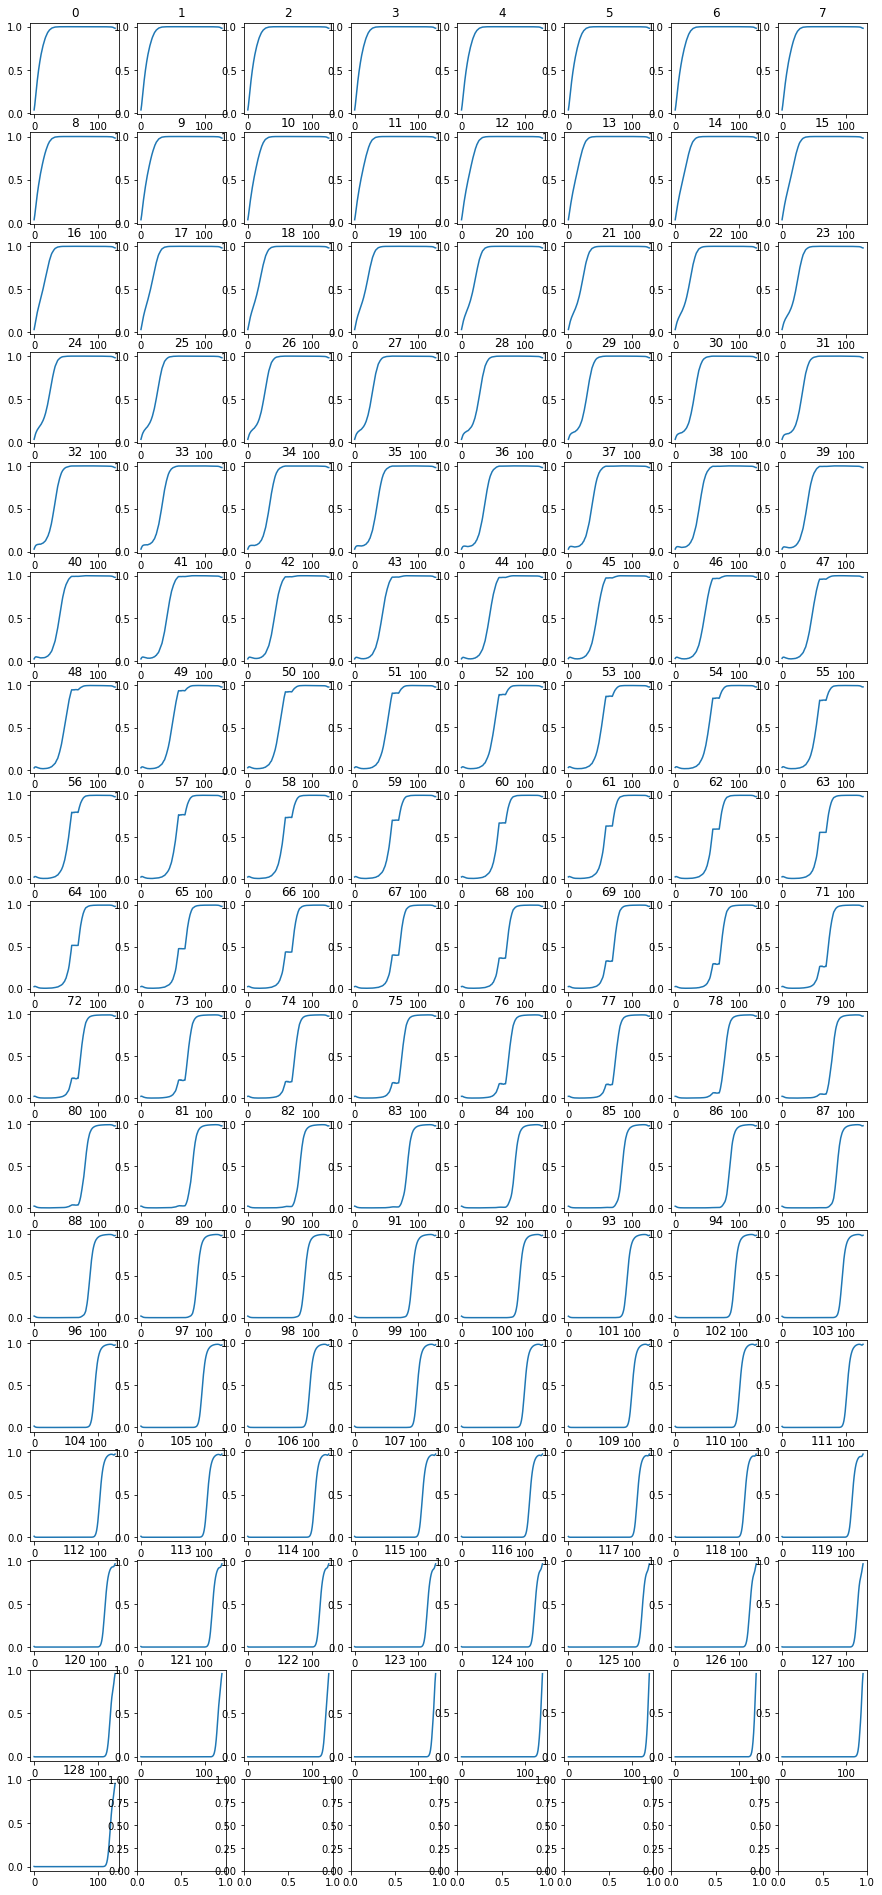

In [ ]:
activation = {}
model.fc1.register_forward_hook(get_activation('fc1'))
X_predicted = model(X).detach().numpy()
#print(X_predicted)
#visualization_step_function(X_predicted[0])
full_visualization(X_predicted)

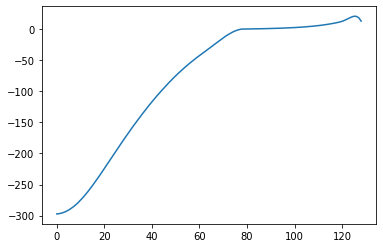

In [ ]:
#print(activation['fc1'].detach().numpy())
plt.plot(activation['fc1'].detach().numpy())

In [ ]:
print(model.fc1.weight)
print(model.fc2.weight)

Parameter containing:
tensor([[-0.4239, -0.8598, -1.2942, -1.6955, -2.0608, -2.4640, -2.7843, -3.1932,
         -3.5217, -3.9188, -4.1231, -4.5361, -4.6214, -4.9483, -5.1085, -5.2970,
         -5.3525, -5.5069, -5.6566, -5.6522, -5.7562, -5.7129, -5.7261, -5.6908,
         -5.7600, -5.6352, -5.7460, -5.6947, -5.4799, -5.4673, -5.4689, -5.3248,
         -5.1873, -5.1950, -5.1637, -4.9767, -4.9529, -4.9008, -4.8389, -4.6367,
         -4.6307, -4.4727, -4.4119, -4.2634, -4.2134, -4.1483, -4.1249, -3.9858,
         -3.8926, -3.7581, -3.6847, -3.5056, -3.4835, -3.3940, -3.2974, -3.2112,
         -3.1133, -3.0600, -2.9584, -2.7706, -2.8990, -2.8031, -2.8943, -2.8291,
         -2.8722, -2.9212, -2.7824, -2.7853, -2.8745, -2.8915, -2.6941, -2.4581,
         -2.2189, -2.0806, -1.7096, -1.3481, -1.1171, -0.5252, -0.0510, -0.0604,
         -0.0640, -0.0681, -0.0693, -0.0725, -0.0763, -0.0808, -0.0853, -0.0918,
         -0.0965, -0.1019, -0.1096, -0.1161, -0.1252, -0.1332, -0.1427, -0.1532,
      